In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

data = pd.read_csv('diabetes (2).csv')


In [2]:
# data Cleaning 
#remove all the 0 BMI 
#reduced from 768 to 757
data= data[data['BMI'] != 0]

data.describe()



Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   757.000000  757.000000     757.000000     757.000000  757.000000   
mean      3.844122  121.136063      69.690885      20.774108   80.841480   
std       3.369959   32.061428      18.283325      15.908567  115.710818   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   37.000000   
75%       6.000000  141.000000      80.000000      32.000000  130.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                757.000000  757.000000  757.000000  
mean    32.457464                  0.472437   33.281374    0.351387  
std      6.924988                  0.329474   11.697752    0.477719  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.244000   24.000000    0.000000  
50%     32.300000                  0.376000   29.000000    0.000000  
75%     36.600000                  0.627000   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [3]:
pip install dfply


  Using cached dfply-0.3.3-py3-none-any.whl (612 kB)
Note: you may need to restart the kernel to use updated packages.


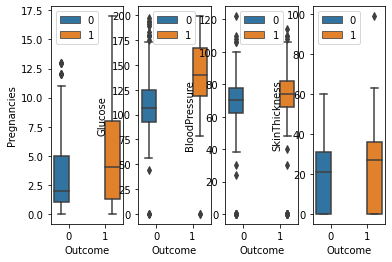

In [4]:
#EDA
#data re-structure
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=4)
sns.boxplot(data=data, x="Outcome", y="Pregnancies", hue=data.Outcome.tolist(), ax=axs[0])
sns.boxplot(data=data, x="Outcome", y="Glucose", hue=data.Outcome.tolist(), ax=axs[1])
sns.boxplot(data=data, x="Outcome", y="BloodPressure", hue=data.Outcome.tolist(), ax=axs[2])
sns.boxplot(data=data, x="Outcome", y="SkinThickness", hue=data.Outcome.tolist(), ax=axs[3])

plt.show()


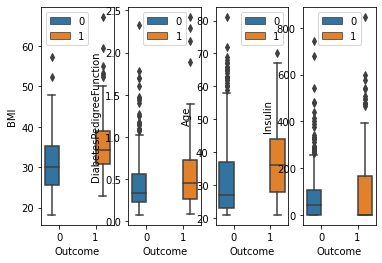

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=4)
sns.boxplot(data=data, x="Outcome", y="BMI", hue=data.Outcome.tolist(), ax=axs[0])
sns.boxplot(data=data, x="Outcome", y="DiabetesPedigreeFunction", hue=data.Outcome.tolist(), ax=axs[1])
sns.boxplot(data=data, x="Outcome", y="Age", hue=data.Outcome.tolist(), ax=axs[2])
sns.boxplot(data=data, x="Outcome", y="Insulin", hue=data.Outcome.tolist(), ax=axs[3])

plt.show()

In [6]:
#t-test
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
# Subset data age
Outcome_1_age = data.query('Outcome == 1')['Age']
Outcome_2_age = data.query('Outcome == 0')['Age']

from scipy import stats
tStat, pValue = stats.ttest_ind(Outcome_1_age, Outcome_2_age, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic


P-Value:2.844808693195501e-11 T-Statistic:6.788615284831773


In [7]:
# Subset data BMI
Outcome_1_BMI = data.query('Outcome == 1')['BMI']
Outcome_2_BMI = data.query('Outcome == 0')['BMI']

from scipy import stats
tStat, pValue = stats.ttest_ind(Outcome_1_BMI, Outcome_2_BMI, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic


P-Value:2.4835713809715237e-18 T-Statistic:9.055003741836805


In [8]:
#add two new column Diabetic & Age_Group
data.loc[data['Age'] .between(21, 24), 'Age_Group'] = 'Age1' 
data.loc[data['Age'] .between(24, 29), 'Age_Group'] = 'Age2' 
data.loc[data['Age'] .between(29, 41), 'Age_Group'] = 'Age3' 
data.loc[data['Age'] .between(41, 81), 'Age_Group'] = 'Age4' 

# Diabetic
data.loc[data['Outcome'] == 0, 'Diabetic'] = 'Not-Diabetic' 
data.loc[data['Outcome'] == 1, 'Diabetic'] = 'Diabetic' 
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome Age_Group      Diabetic  
0                       0.627   50        1      Age4      Diabetic  
1                       0.351   31        0      Age3  Not-Diabetic  
2                       0.672   32        1      Age3      Diabetic  
3                       0.167   21        0      Age1  Not-Diabetic  
4                       2.288   33        1      Age3      Diabetic  
..                        ...  ...      ...       ...           ...  
763                     0.171   63        0      Age4  Not-Diabetic  
764                     0.340   27        0      Age2  Not-Diabetic  
765                     0.245   30        0      Age3  Not-Diabetic  
766                     0.349   47        1      Age4      Diabetic  
767                     0.315   23        0      Age1  Not-Diabetic  

[757 rows x 11 columns]

In [9]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   757.000000  757.000000     757.000000     757.000000  757.000000   
mean      3.844122  121.136063      69.690885      20.774108   80.841480   
std       3.369959   32.061428      18.283325      15.908567  115.710818   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   37.000000   
75%       6.000000  141.000000      80.000000      32.000000  130.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                757.000000  757.000000  757.000000  
mean    32.457464                  0.472437   33.281374    0.351387  
std      6.924988                  0.329474   11.697752    0.477719  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.244000   24.000000    0.000000  
50%     32.300000                  0.376000   29.000000    0.000000  
75%     36.600000                  0.627000   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
pip install pingouin

Processing /home/jovyan/.cache/pip/wheels/8e/f4/3f/2629f2a31641ee865256bd1a03e0f3c66cea7ba4fa30ca7f9e/pingouin-0.5.1-py3-none-any.whl
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Processing /home/jovyan/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a/littleutils-0.2.2-py3-none-any.whl
  Using cached xarray-2022.3.0-py3-none-any.whl (870 kB)
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='Diabetic', ylabel='BMI'>

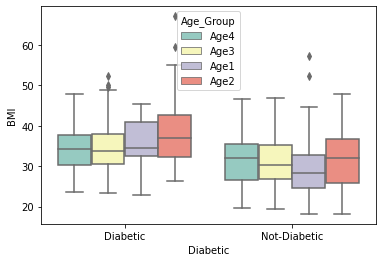

In [11]:
sns.boxplot(x="Diabetic", y="BMI", hue="Age_Group", data=data, palette="Set3")

In [12]:
#doing the 2 way anova with statsmodels
from statsmodels.formula.api import ols

model = ols('BMI ~ C(Diabetic) + C(Age_Group) + C(Diabetic):C(Age_Group)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F        PR(>F)
C(Diabetic)                3106.863245    1.0  73.838441  4.903689e-17
C(Age_Group)                669.284307    3.0   5.302123  1.275785e-03
C(Diabetic):C(Age_Group)    502.485808    3.0   3.980732  7.893498e-03
Residual                  31515.299253  749.0        NaN           NaN

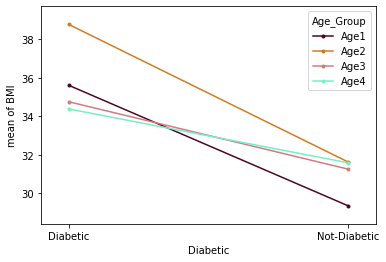

In [13]:
#interaction plot
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['Diabetic'], trace=data['Age_Group'], response=data['BMI'], 
    colors=['#4c061d','#d17a22','#d17a82','#76EEC6'])
plt.show()

In [14]:
pip install bioinfokit


Processing /home/jovyan/.cache/pip/wheels/40/b8/82/23dd1b441e2c834181d4c595cff79f091212eb2c482e0550e2/bioinfokit-2.0.8-py3-none-any.whl
  Using cached textwrap3-0.9.2-py2.py3-none-any.whl (12 kB)
Processing /home/jovyan/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63/adjustText-0.7.3-py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/fb/24/13/4c7b7f4121843c2fc7c5d6b4b1e3ab57be33428997761f996f/matplotlib_venn-0.11.7-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [15]:
#post hoc test for main effect Age_Group
from bioinfokit.analys import stat
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var='Age_Group', anova_model='BMI~C(Age_Group)+C(Diabetic)+C(Age_Group):C(Diabetic)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1 group2      Diff     Lower     Upper   q-value   p-value
0   Age4   Age3  0.203469 -1.471967  1.878905  0.442217  0.900000
1   Age4   Age1  2.846875  1.082396  4.611354  5.875132  0.001000
2   Age4   Age2  0.370948 -1.335931  2.077827  0.791363  0.900000
3   Age3   Age1  2.643406  0.907133  4.379680  5.543851  0.001000
4   Age3   Age2  0.574417 -1.103288  2.252121  1.246744  0.790452
5   Age1   Age2  3.217823  1.451189  4.984456  6.632564  0.001000

In [16]:
#post hoc test for main effect Diabetic
res.tukey_hsd(df=data, res_var='BMI', xfac_var='Diabetic', anova_model='BMI ~ C(Age_Group) + C(Diabetic) + C(Age_Group):C(Diabetic)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1        group2      Diff     Lower     Upper    q-value  p-value
0  Diabetic  Not-Diabetic  4.547093  3.577618  5.516568  13.021548    0.001

##### interaction effect between Diabetic and Age_Group on the BMI score 
res.tukey_hsd(df=data, res_var='BMI', xfac_var=['Diabetic','Age_Group'], anova_model='BMI ~ C(Diabetic) + C(Age_Group) + C(Diabetic):C(Age_Group)')
res.tukey_summary

In [17]:
model = ols('BMI ~ C(Diabetic) + C(Age_Group) + C(Diabetic):C(Age_Group)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq     df          F        PR(>F)
C(Diabetic)                3106.863245    1.0  73.838441  4.903689e-17
C(Age_Group)                669.284307    3.0   5.302123  1.275785e-03
C(Diabetic):C(Age_Group)    502.485808    3.0   3.980732  7.893498e-03
Residual                  31515.299253  749.0        NaN           NaN

In [18]:
res = stat()
res.anova_stat(df=data, res_var='BMI', anova_model='BMI ~ C(Diabetic) + C(Age_Group) + C(Diabetic):C(Age_Group)')
res.anova_summary

df        sum_sq      mean_sq          F  \
C(Diabetic)                 1.0   3106.863245  3106.863245  73.838441   
C(Age_Group)                3.0    669.284307   223.094769   5.302123   
C(Diabetic):C(Age_Group)    3.0    502.485808   167.495269   3.980732   
Residual                  749.0  31515.299253    42.076501        NaN   

                                PR(>F)  
C(Diabetic)               4.903689e-17  
C(Age_Group)              1.275785e-03  
C(Diabetic):C(Age_Group)  7.893498e-03  
Residual                           NaN

In [19]:
res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var='Age_Group', anova_model='BMI ~ C(Diabetic) + C(Age_Group) + C(Diabetic):C(Age_Group)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1 group2      Diff     Lower     Upper   q-value   p-value
0   Age4   Age3  0.203469 -1.471967  1.878905  0.442217  0.900000
1   Age4   Age1  2.846875  1.082396  4.611354  5.875132  0.001000
2   Age4   Age2  0.370948 -1.335931  2.077827  0.791363  0.900000
3   Age3   Age1  2.643406  0.907133  4.379680  5.543851  0.001000
4   Age3   Age2  0.574417 -1.103288  2.252121  1.246744  0.790452
5   Age1   Age2  3.217823  1.451189  4.984456  6.632564  0.001000

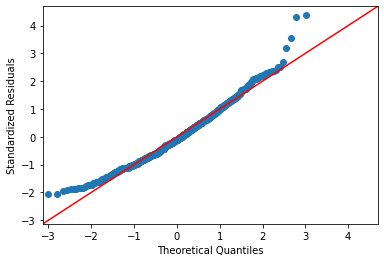

In [20]:
#Normality check
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

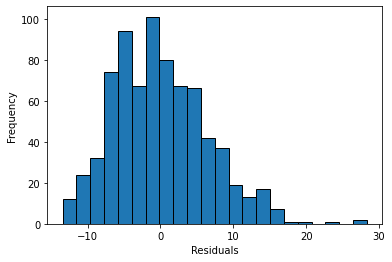

In [21]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [22]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9778076410293579 2.617032590634949e-09


In [23]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=data, res_var='BMI', xfac_var=['Age_Group', 'Diabetic'])
res.levene_summary

Parameter   Value
0      Test statistics (W)  2.0538
1  Degrees of freedom (Df)  7.0000
2                  p value  0.0463

In [24]:
#MLR
X = data[['Age', 'Outcome']]
y = data['BMI']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Age        -0.019758
Outcome     4.556845

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

Actual  Predicted
660    27.7  30.410692
688    24.1  31.023188
504    37.3  30.687303
83     24.6  31.042946
367    21.0  31.062704
..      ...        ...
161    37.2  30.588513
122    33.6  31.023188
584    28.7  35.007052
484    44.2  35.421969
186    30.1  34.848989

[152 rows x 2 columns]

In [30]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 5.417737119989975
MSE: 46.282037428655194
RMSE: 6.803090285205334


In [31]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)

print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.11264274837382693
mean_sqrd_error is== 46.282037428655194
root_mean_squared error of is== 6.803090285205334


In [36]:
#building ancova model
from pingouin import ancova
ancova(data=data, dv='BMI', covar='Outcome', between='Age')


Source            SS   DF          F         p-unc       np2
0       Age   2565.465408   51   1.175684  1.932739e-01  0.078486
1   Outcome   2636.564735    1  61.621605  1.552244e-14  0.080486
2  Residual  30121.603960  704        NaN           NaN       NaN

In [3]:
#statistical power example
import numpy as np
import pandas as pd

from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

In [4]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

power_analysis = TTestIndPower()
sample_size1 = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)

power_analysis = TTestIndPower()
sample_size2 = power_analysis.solve_power(effect_size=0.9, power=0.8, alpha=0.05)

power_analysis = TTestIndPower()
sample_size3 = power_analysis.solve_power(effect_size=0.5, power=0.9, alpha=0.05)

power_analysis = TTestIndPower()
sample_size4 = power_analysis.solve_power(effect_size=0.9, power=0.9, alpha=0.05)

print('Required sample size1: {0:.2f}'.format(sample_size1))
print('Required sample size2: {0:.2f}'.format(sample_size2))
print('Required sample size3: {0:.2f}'.format(sample_size3))
print('Required sample size4: {0:.2f}'.format(sample_size4))

Required sample size1: 63.77
Required sample size2: 20.39
Required sample size3: 85.03
Required sample size4: 26.94


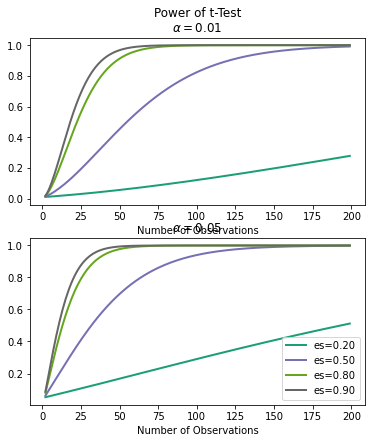

In [5]:
# power and number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8, 0.9]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8, 0.9]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)